In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing


In [14]:
#Loading the csv file to the pandas dataframe
data= pd.read_csv('/content/drive/MyDrive/ML Algorithms/Gold Price Prediction/gld_price_data.csv')
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
#Number of rows and columns
data.shape

(2290, 6)

In [16]:
#Getting some basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [17]:
 #Getting the statistical measures of the data
 data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :

   1. Positive Correlation
   2. Negative Correlation

In [18]:
correlation = data.corr()

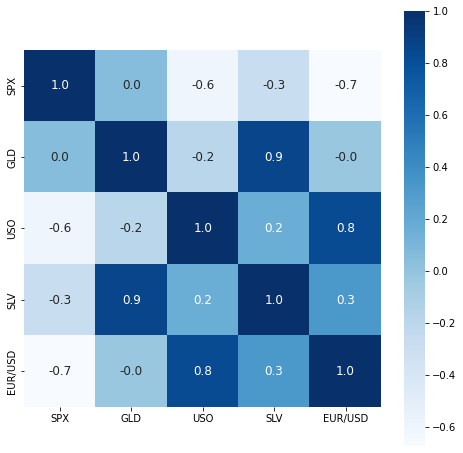

In [19]:
# constructing a hitmap to understand the correlation
plt.figure(figsize = (8, 8))
sns.heatmap(correlation , cbar = True, square =True, fmt = '.1f', annot = True, annot_kws ={'size' : 12}, cmap='Blues' )

In [20]:
#Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


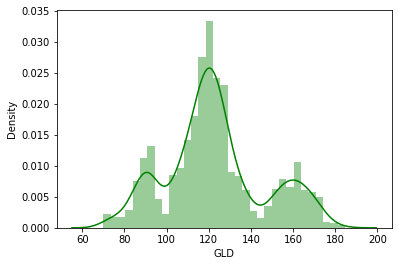

In [21]:
#Checking the distribution of the GLD price
sns.distplot(data['GLD'], color = 'green')

Splitting the Features and Target

In [22]:
x = data.drop(['Date', 'GLD'], axis = 1)
y = data['GLD']


Splitting into Training data and test data

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2, random_state = 2)


Model Training : Random Forest Regressor

In [25]:
  regressor = RandomForestRegressor(n_estimators = 100)

In [27]:
#Training the model
regressor.fit(X_train, Y_train)


RandomForestRegressor()

Model Evaluation

In [28]:
#Prediction on Test data
test_data_prediction = regressor.predict(X_test)


In [30]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error  : ', error_score)

R squared error  :  0.9887215936030622


Compare the Actual Values and Predicted Values in a Plot

In [31]:
Y_test = list(Y_test)

In [ ]:
plt.plot(Y_test , color = 'green', label = 'Actual values')
plt.plot(test_data_prediction, color = 'red', label ='Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel("GLD Price")
plt.legend()
plt.show()

The predicted values are almost close to the actual values\